<a href="https://colab.research.google.com/github/mkdelavina/Data-Analytics-Portfolio/blob/main/colab/Berlin_Rentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python Session #3: Data Summary / Satistics - Homework Assignment


## Lecture Structure:

1. Measure of central tendency

- Mean
- Median
- Mode

2. Measure of spread

- Range
- Standard Deviation

3. Correlation coeffcient

## We will use:
- `statistics.mean()`,
`statistics.median()`,
`statistics.mean()`,
`groupby.mean()`,
`groupby.median()`,
`gmean()`,
`statistics.stdev()`,
`corr()`,
`numpy.corrcoef()`

In [ ]:
### Importing libraries and packages
import pandas as pd
import numpy as np
import statistics as st
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
### Reading data

rentals = pd.read_csv("https://raw.githubusercontent.com/juliandnl/redi_ss20/master/berlin_rental.csv")

## **Question #1**

Identify the best region to live, based on:

1. Average Price

2. Average Rooms Available

3. Average Space

4. What type of apartment condition is mostly available in Mitte, Kruezberg and Wilmersforf respectively?

In [ ]:
### Identify the best region to live, based on: Average Price

ave_price = rentals.groupby("Region")["Rent"].mean().sort_values(ascending=True).reset_index()
print(ave_price.loc[0,"Region"], "has the lowest average rent at ",round(ave_price.loc[0,"Rent"],2))

Wedding has the lowest average rent at  847.14


In [ ]:
### Identify the best region to live, based on: Average Rooms Available
ave_room = rentals.groupby("Region")["Rooms"].mean().sort_values(ascending=False).reset_index().round(2)
print(ave_room.loc[0,"Region"],"has the highest ave. number of rooms at ",ave_room.loc[0,"Rooms"])

Mitte has the highest ave. number of rooms at  2.75


In [ ]:
### Identify the best region to live, based on: Average Space
rentals
ave_space = rentals.groupby("Region")["Space"].mean().sort_values(ascending=False).reset_index().round(2)
ave_space
print(ave_space.loc[0,"Region"],"has the biggest ave. space at ",ave_space.loc[0,"Space"])



Mitte has the biggest ave. space at  96.24


In [ ]:
# ## What type of apartment condition is mostly available in Mitte, Kruezberg
# and Wedding respectively?
mitte = rentals.loc[rentals["Region"] == "Mitte","Condition"].value_counts().sort_values(ascending=False).reset_index()
kreuzberg = rentals.loc[rentals["Region"] == "Kreuzberg","Condition"].value_counts().sort_values(ascending=False).reset_index()
wedding = rentals.loc[rentals["Region"] == "Wedding","Condition"].value_counts().sort_values(ascending=False).reset_index()

print("The most common type of apartment in Mitte, Kreuzberg, and wedding are ")
print(mitte.loc[0,"Condition"],", ",kreuzberg.loc[0,"Condition"],", ",wedding.loc[0,"Condition"]," respectively.")


mitte



The most common type of apartment in Mitte, Kreuzberg, and wedding are 
mint_condition ,  mint_condition ,  mint_condition  respectively.


,Condition,count
0,mint_condition,49
1,first_time_use,43
2,no_information,29
3,refurbished,15
4,first_time_use_after_refurbishment,7
5,well_kept,6
6,fully_renovated,3
7,modernized,1


## **Question #2**

1. In what location are both the mean and median are same in terms of apartment Space?
2. Identify the location where the apartment rent variation is the highest
3. What is the average price of 2 room apartment in Mitte?

In [ ]:
### In what location are both the mean and median are same in terms of apartment Space?
rentals.groupby("Region")["Space"].agg(["mean","median"]).round(0)


,mean,median
Region,,
Charlottenburg,88.0,81.0
Friedrichsfelde,66.0,62.0
Kreuzberg,92.0,86.0
Köpenick,74.0,74.0
Mitte,96.0,85.0
Neukölln,70.0,66.0
Prenzlauer,96.0,80.0
Tiergarten,90.0,89.0
Wedding,47.0,38.0


The region where the mean and median are the same,in terms of space, is Köpenick.

In [ ]:
### Identify the location where the apartment rent variation is very the highest
rent_std = rentals.groupby("Region")["Rent"].std().sort_values(ascending=False).reset_index()
print("The region with the highest variation in rent is ",rent_std.loc[0,"Region"])


The region with the highest variation in rent is  Mitte


In [ ]:
### What is the average price of 2 room apartment in Mitte?
mitte_ave = rentals.loc[(rentals["Rooms"] == 2) & (rentals["Region"] == "Mitte"),["Rent"]].mean()
print("The average price of a 2-room apartment in Mitte is ",round(mitte_ave))

The average price of a 2-room apartment in Mitte is  Rent    1806.0
dtype: float64


## **Question #3**

Identify an outlier from the rentals dataset. Statistically show the difference in central tendency with and without those outliers.



**Hint**

Identify the outliers visually with a plot.

Rent mean with outlier:  1768.56  without:  1741.73
Rent median with outlier:  1565.48  without:  1565.2
Rent mode with outlier:  1650.0  without:  1650.0


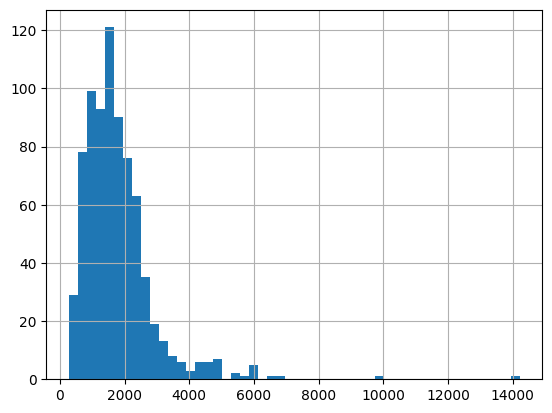

In [ ]:
#Answer

#Rent prices
rentals["Rent"].hist(bins=50)
#excluding apartments with rents higher than 8000
rent_cleaned = rentals.loc[rentals["Rent"] <= 8000,"Rent"]
print("Rent mean with outlier: ",round(rentals["Rent"].mean(),2)," without: ",round(rent_cleaned.mean(),2))
print("Rent median with outlier: ",round(rentals["Rent"].median(),2), " without: ", round(rent_cleaned.median(),2))
print("Rent mode with outlier: ",rentals["Rent"].mode()[1]," without: ",rent_cleaned.mode()[1])



Space mean with outlier:  84.66  without:  83.11
Space median with outlier:  77.6  without:  77.0
Space mode with outlier:  60.0  without:  60.0


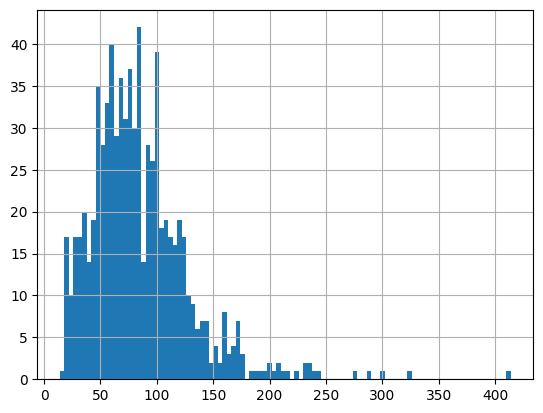

In [ ]:
#Rent prices
rentals["Space"].hist(bins=100)
#excluding apartments with space bigger than 250
space_cleaned = rentals.loc[rentals["Space"] <= 250,"Space"]
print("Space mean with outlier: ",round(rentals["Space"].mean(),2)," without: ",round(space_cleaned.mean(),2))
print("Space median with outlier: ",round(rentals["Space"].median(),2), " without: ", round(space_cleaned.median(),2))
print("Space mode with outlier: ",rentals["Space"].mode()[1]," without: ",space_cleaned.mode()[1])

**Conclusion**: For both Rent and Space
*   The mean became lower after removing the outliers or the values that are way too high compared to the rest.
*  The median also got lower by a little bit.
*  The mode is not affected as they are the most common values.  



## **EXTRA MATERIAL**

**Using groupby with different functions for different columns**

The `.agg()` method also allows you to apply different functions to different columns. It's done by using a dictionary where the columns selected are the keys, and the functions you want to apply to each columns are the values. There is no need to select the columns before applying `.agg()` in this case, as the columns are selected inside the dictionary.

**Useful aggregation functions:**
- `mean()`
- `median()`
- `var()`
- `std()`
- `min()`
- `max()`
- `count()`
- `sum()`
- `nunique()`

**Bonus question #1:**

Revisit the `describe()` method from session #1. Study the output of the describe method, draw a simple barplot or any visual diagram for the dataset and check your understanding about the dataset.

25%:  1040.0
55%:  1565.56
75%:  2170.0
The percentiles show under which value a certain portion of the dataset falls under
Ex: The 25th percentile for rent means 25% of the appartments cost 1040 or lower.


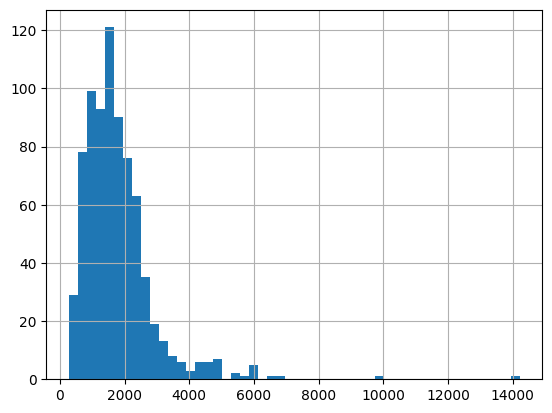

In [ ]:
### Bonus question #1:

rentals["Rent"].hist(bins=50)

#sorting the values in ascending order
r = rentals["Rent"].sort_values(ascending=True).reset_index(0)

#finding the rows at the 25%, 50% and 75% marks
percentile25 = round(len(r)/4)
percentile50 = 2*round(len(r)/4)
percentile75 = 3*round(len(r)/4)

print("25%: ",r.loc[percentile25,"Rent"])
print("55%: ",r.loc[percentile50,"Rent"])
print("75%: ",r.loc[percentile75,"Rent"])
rentals.describe()
print("The percentiles show under which value a certain portion of the dataset falls under")
print("Ex: The 25th percentile for rent means 25% of the appartments cost 1040 or lower.")



**Bonus question #2:**

Below mentioned are the points for 2 teams who participated in a Premiere league football batch. When a team wins a match, they get **3** points, if they lose the match then they get **0** points and if the match is draw then they get **1** point.

Study the data and share your understanding, mainly

According to you, Which team has performed better, why?

Team A : { 3,1,3,1,3,1,0,1,0,1,0,0,1,3,3,1,1,3,1,0 }

Team B : { 3,1,3,1,3,0,0,0,0,0,0,0,1,3,3,1,1,3,1,3 }

In [ ]:
### Bonus question #2:
team_a = pd.DataFrame([3,1,3,1,3,1,0,1,0,1,0,0,1,3,3,1,1,3,1,0],columns=["Score"])
team_b = pd.DataFrame([3,1,3,1,3,0,0,0,0,0,0,0,1,3,3,1,1,3,1,3],columns=["Score"])

#calculating the win/draft games over total games
team_a_wins_percent = len(team_a[team_a["Score"] > 0])/len(team_a)*100
team_b_wins_percent = len(team_b[team_b["Score"] > 0])/len(team_b)*100

print("In my opinion, Team A performed better becuase ", team_a_wins_percent,"% of their total games ended in a win or draw")
print("while it is only ",team_b_wins_percent,"% for team B")

In my opinion, Team A performed better becuase  75.0 % of their total games ended in a win or draw
while it is only  65.0 % for team B


**Bonus question #3**

Dependent vs independent variables - do you how to identify them? You can read about them here, or go straight to the task below:
https://www.statology.org/independent-vs-dependent-variables/

For the rentals dataset, identify:
- dependent variable
- indpendent variable(s)

Statistically prove their relation, use the help of visual diagram whenever necessary.

<Axes: >

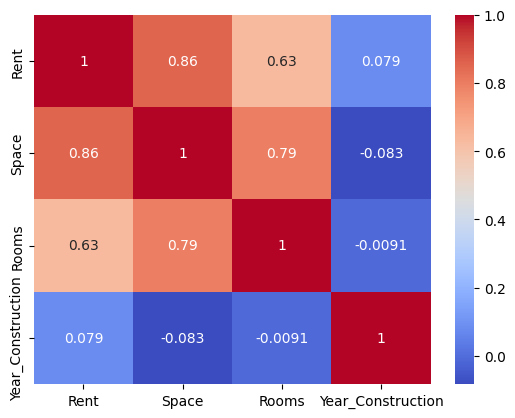

In [ ]:
### Bonus question #3:

rentals_corr = rentals[["Rent","Space","Rooms","Year_Construction"]].corr()
sns.heatmap(data = rentals_corr, annot = True, cmap = 'coolwarm')

**Conclusion**
Based on the above correlation heatmap, there is very high correlation between space and rent price. There is medium correlation between the number of room and price. Year of construction has low correlation with rent price.

The dependent variable is the rental price and the independent variables are the apartment space and number of rooms.